Fine-tuning a Decision Tree for the Moons dataset¶

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Visualization

In [ ]:
# This function will help in visualization of our dataset.
def plot_dataset(X, y, axes):
    plt.figure(figsize=(10,6))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",alpha = 0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",alpha = 0.2)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

Our dataset contains two features  x1
  and  x2
 , it has ten thousand instances with a Guassian noise of 0.4. it's a binary classification the labels are either 0 or 1.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=21)

Since we have two features it will be easy to visualize the data:

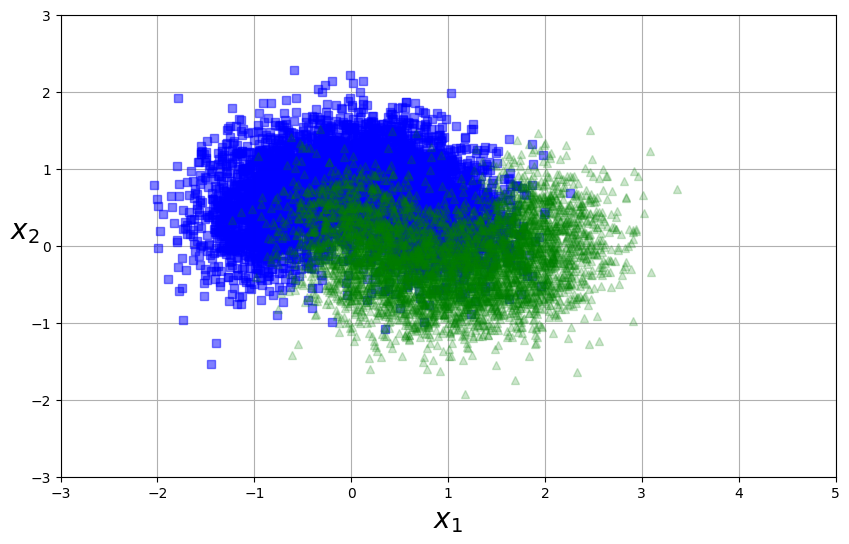

In [ ]:
plot_dataset(X, y, [-3, 5, -3, 3])

Splitting the dataset into training and testing set:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Selecting the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

We have to select the parameters for our GridSearch:

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter = {
             'criterion' : ["gini", "entropy"],
             'max_leaf_nodes': list(range(2, 50)),
             'min_samples_split': [2, 3, 4]
            }

Using a cross validation of 5 and measuring accuracy.

In [ ]:
clf = GridSearchCV(tree_clf, parameter, cv = 5,scoring = "accuracy",return_train_score=True,n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, scoring='accuracy')

Getting the best parameter:

In [ ]:
clf.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 26, 'min_samples_split': 2}

Taking a closer look at the training results:

In [ ]:
cvres = clf.cv_results_
for mean_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    print(mean_score, params)

0.7754375 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.7754375 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.7754375 {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.8220625 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.8220625 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3}
0.8220625 {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4}
0.8578125 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.8578125 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.8578125 {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.8578125 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.8578125 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 3}
0.8578125 {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 4}
0.8578125 {'criterion': 'gini', 'max_leaf_nodes': 6, 'min_samples_split': 2}

We have an accuracy of approximately 86% but accuracy is sometimes not a good measure to use, lets see the confusion matrix.

In [ ]:
clf.score(X_train, y_train)

0.864125

In [ ]:
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_train)
confusion_matrix(y_train,pred)

array([[3603,  415],
       [ 672, 3310]])

Now from the confusion matrix let's get our precision and recall, which are better metrics.

In [ ]:
from sklearn.metrics import precision_score, recall_score

pre = precision_score(y_train, pred)
re  = recall_score(y_train, pred)
print(f"Precision: {pre}  Recall:{re}")

Precision: 0.8885906040268456  Recall:0.8312405826217981


Not bad we have a higher precision than recall but lets combine the two metrics into  F1
  score.

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, pred)

0.8589593875697418

Getting the testing score:

In [ ]:
clf.score(X_test, y_test)

0.858

We have an accuracy of approximately 85% on the testing set.